In [ ]:
# https://github.com/fenago/datasets/raw/main/default_credit.xls

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%time
# Set your environment in a notebook:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
# pd.set_option('max_columns',None)
pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs

 Numpy: 1.23.5

 sklearn: 1.2.2


In [5]:
df = pd.read_excel('https://github.com/fenago/datasets/raw/main/default_credit.xls')
df.head(5).T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [6]:
# Getting Meta Data Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# Checking for Null Values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Data Preprocessing

In [ ]:
# SEX (0: Female, 1: Male)

In [9]:
print('SEX ' + str(sorted(df['SEX'].unique())))

SEX [1, 2]


In [10]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))  # must be treated (no 0,5,6 defined in the dd)

EDUCATION [0, 1, 2, 3, 4, 5, 6]


In [11]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))  # treat and remove 0's

MARRIAGE [0, 1, 2, 3]


In [12]:
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))  # we must remove -2 and 0 from the

PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [13]:
print('default.payment.next.month ' + str(sorted(df['default payment next month'].unique())))

default.payment.next.month [0, 1]


In [14]:
# consult with the business prior to making any changes
# quanitify the number of changes
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

In [15]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))  # Treated

EDUCATION [1, 2, 3, 4]


In [16]:
fill = (df.MARRIAGE == 0)
df.loc[fill, 'MARRIAGE'] = 2

In [17]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [1, 2, 3]


In [19]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA: Univariate Analytics

<Axes: xlabel='DEFAULT', ylabel='count'>

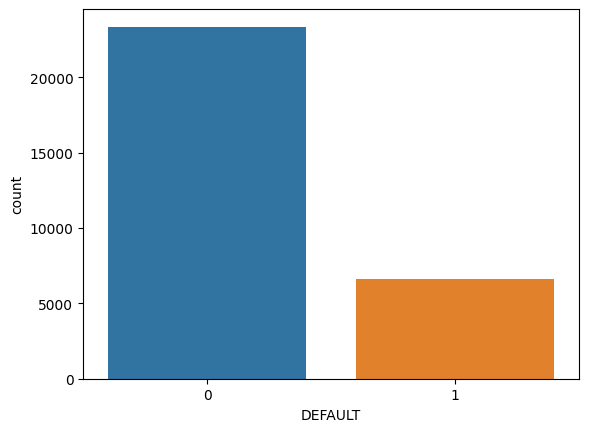

In [20]:
sns.countplot(x="DEFAULT", data=df)

In [21]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [22]:
6636 / (23364 + 6636)

0.2212

<Axes: xlabel='SEX', ylabel='count'>

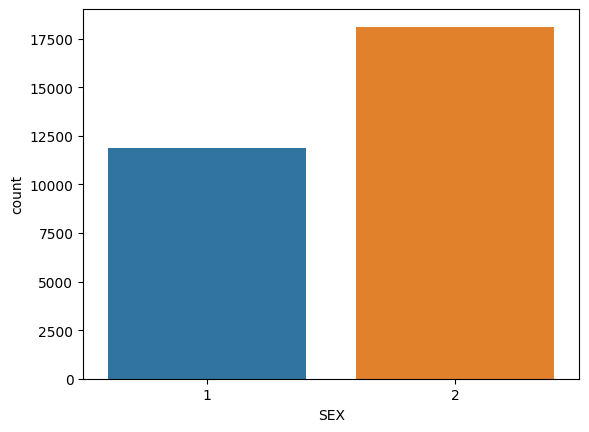

In [23]:
sns.countplot(x="SEX", data=df)

In [24]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

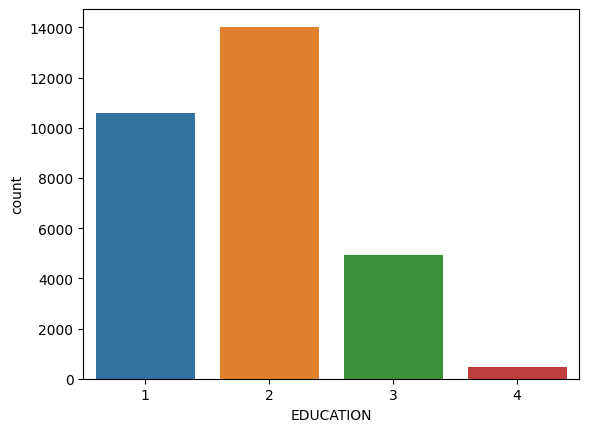

In [25]:
sns.countplot(x="EDUCATION", data=df)

In [26]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

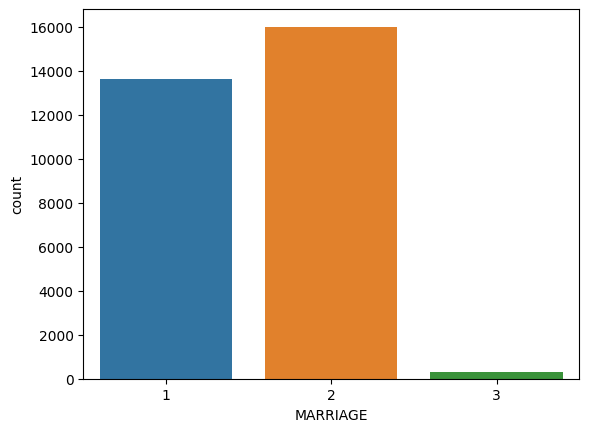

In [27]:
sns.countplot(x="MARRIAGE", data=df)

In [28]:
df['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

# Bivariate Analysis

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

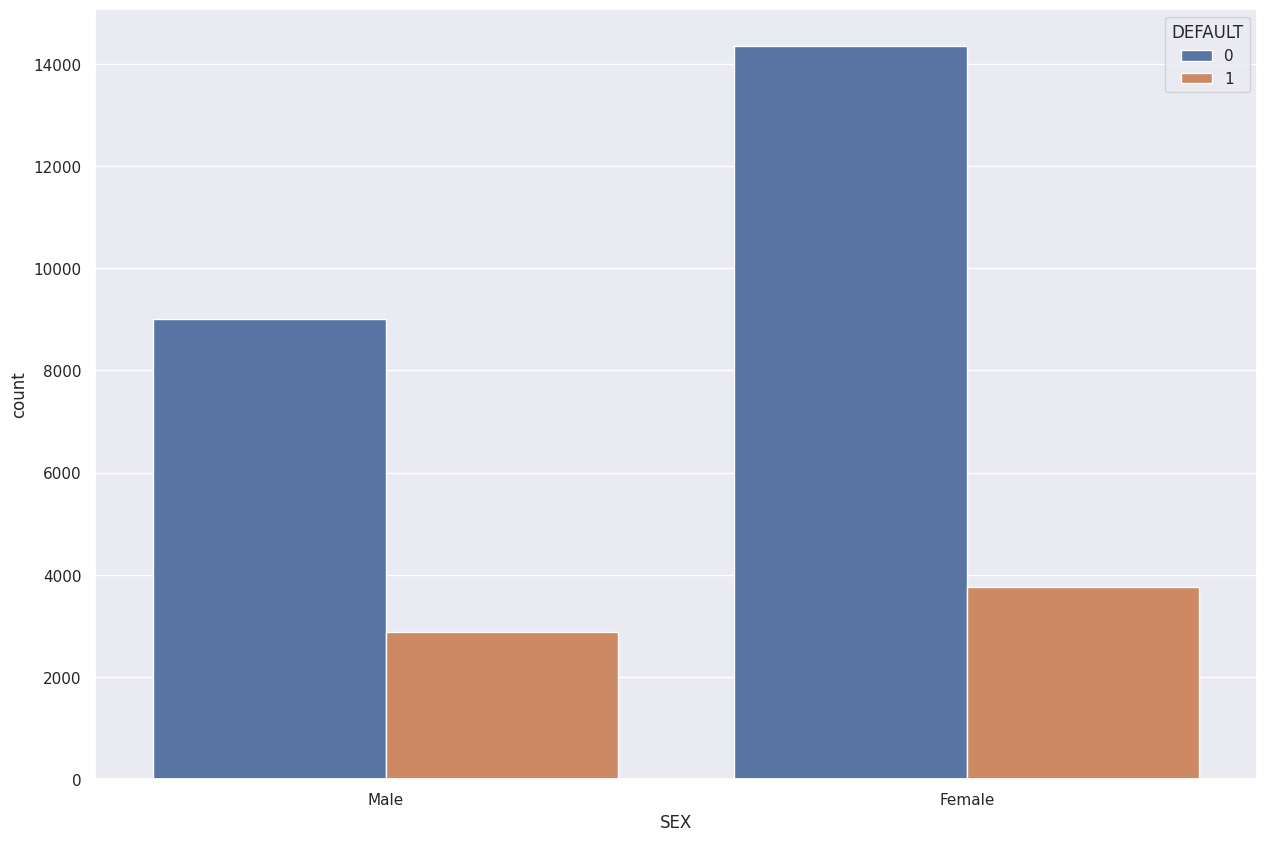

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='SEX', hue='DEFAULT', data=df)
edu.set_xticklabels(['Male','Female'])
plt.show()

In [30]:
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


[Text(0, 0, 'Graduate School'),
 Text(1, 0, 'University'),
 Text(2, 0, 'High School'),
 Text(3, 0, 'Other')]

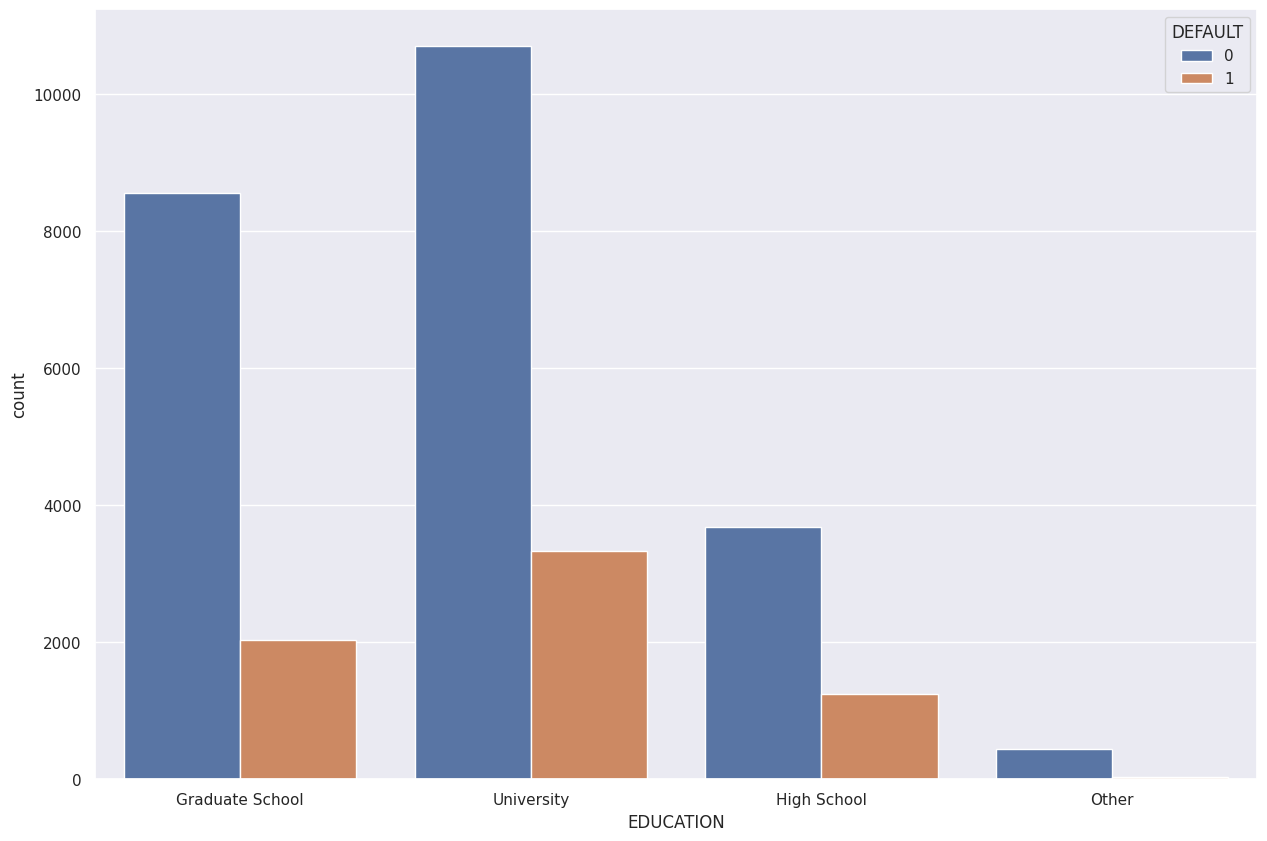

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [32]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513


[Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Other')]

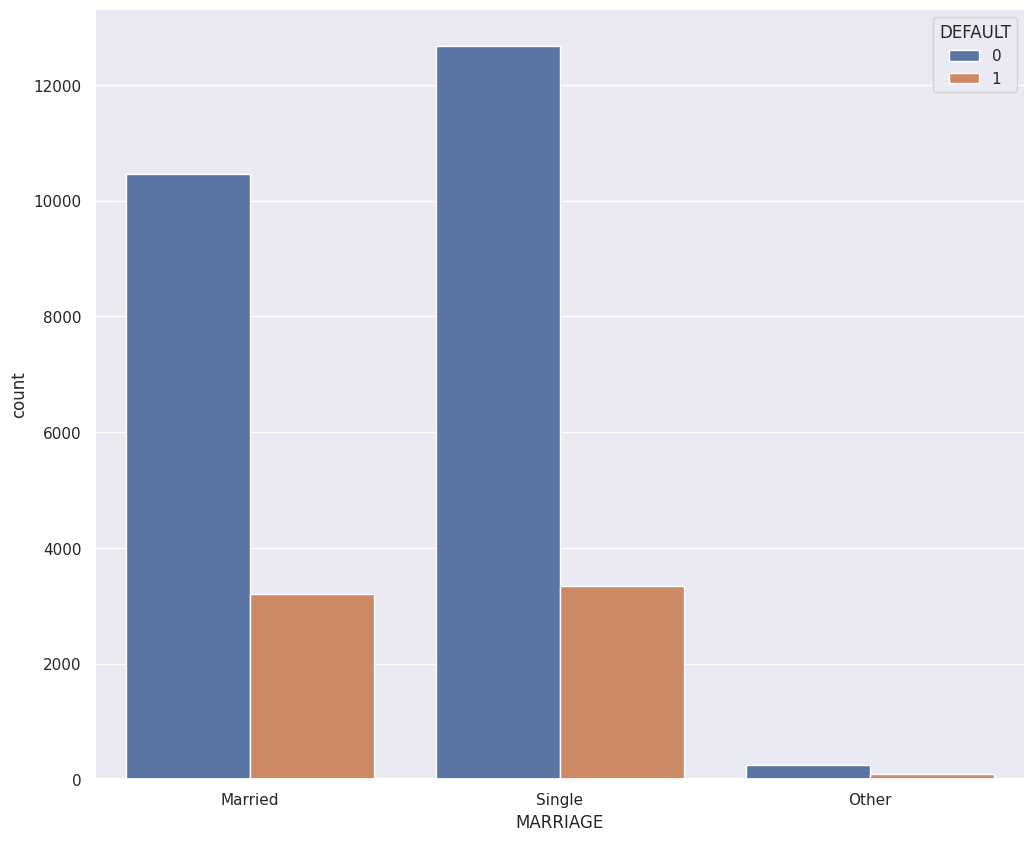

In [33]:
sns.set(rc={'figure.figsize':(12,10)})
marriage = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df)
marriage.set_xticklabels(['Married','Single','Other'])
plt.show()

In [34]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062
All,0.778800,0.221200


In [35]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


In [36]:
pd.crosstab(df.PAY_1,df.DEFAULT,normalize='index', margins=True)

DEFAULT,0,1
PAY_1,,
-2,0.867706,0.132294
-1,0.832219,0.167781
0,0.871887,0.128113
1,0.660521,0.339479
2,0.308586,0.691414
3,0.242236,0.757764
4,0.315789,0.684211
5,0.500000,0.500000
6,0.454545,0.545455


In [37]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


In [38]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


# Analyze via Correlation

In [39]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

<Axes: >

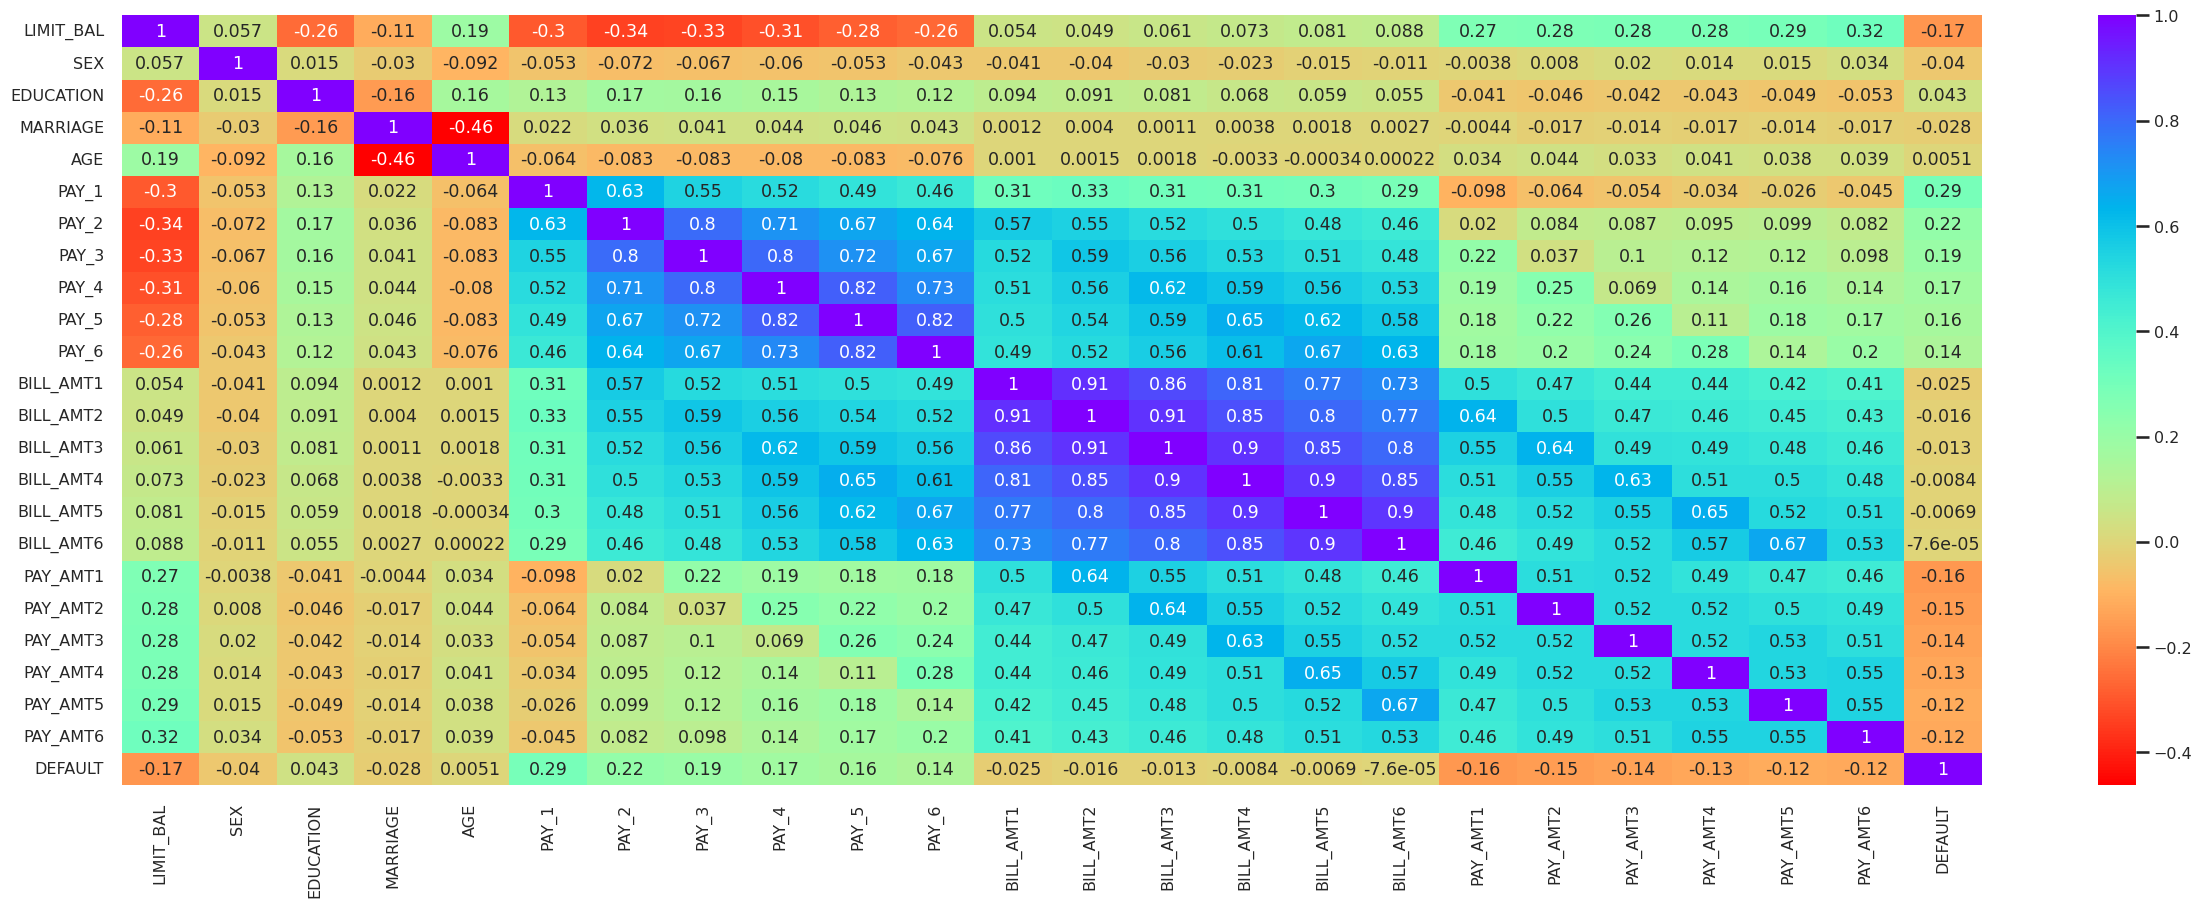

In [40]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [41]:
df.drop("DEFAULT", axis=1).apply(lambda x: x.corr(df.DEFAULT,method='spearman'))

ID          -0.013952
LIMIT_BAL   -0.169586
SEX         -0.039961
EDUCATION    0.043425
MARRIAGE    -0.028174
AGE          0.005149
PAY_1        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
BILL_AMT1   -0.025327
BILL_AMT2   -0.015554
BILL_AMT3   -0.012670
BILL_AMT4   -0.008357
BILL_AMT5   -0.006851
BILL_AMT6   -0.000076
PAY_AMT1    -0.160493
PAY_AMT2    -0.150977
PAY_AMT3    -0.139388
PAY_AMT4    -0.127979
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
dtype: float64

In [43]:
df.drop("DEFAULT", axis=1).apply(lambda x: x.corr(df.DEFAULT, method='pearson')).sort_values(ascending=False) # or spearman

PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.033842
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
ID          -0.013952
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.026672
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
dtype: float64